# 1. Pre-modeling +

--Variable Level	Variable naming convention - Does variables required renaming?

	Data types -Any mismatch in data types?							
	Does data have any special characters?							
		#NA, Nan, #Error, #Division, -inf, inf, 999999, etc.						
	Does data have any missing values?							
		Encoded missings with 0, 999999, unknown, not avaialable, NA etc						
	Does data any outliers							
		Reasons for outliers						
	Categorical variables - Ordinal vs. nominal							
		Converting categorical variables into numerical variables (encoding)						
			Ordinal 	Label/One-Hot encoding (dummy variables)				
			Nomianl	One-hot encoding				
	Does data having any date variables?							
		Derived variables out of Date variables						
	String variables - Extract variables out of string which can make sense							
	Does data have any duplicates?							
		Key level (one variable or combination of variable)						
		Record level						
	Derived variables - Definition							
	Exploratory analysis							
		Univariate		Distribution, variation etc				
		Bivariate		Relationships				
	Does variable having variance?							
		Near zero variance variable (CV<0.05)	

--1.1 Importing Packages

In [23]:
#Package(s) for Operating Systems
import os

#Package(s) for Data Importing & Manipulations
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling as pp
import re

#Packages for Statistic Analysis
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

#Packages for Model Building Part
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

#Packages for building models
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


--1.2 Importing Data

In [24]:
sales = pd.read_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\Car_sales.csv')
sales.head()

Manufacturer    Model  Sales_in_thousands  four_year_resale_value  \
0        Acura  Integra              16.919                  16.360   
1        Acura       TL              39.384                  19.875   
2        Acura       CL              14.114                  18.225   
3        Acura       RL               8.588                  29.725   
4         Audi       A4              20.397                  22.255   

  Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  \
0    Passenger               21.50          1.8       140.0      101.2   67.3   
1    Passenger               28.40          3.2       225.0      108.1   70.3   
2    Passenger                 NaN          3.2       225.0      106.9   70.6   
3    Passenger               42.00          3.5       210.0      114.6   71.4   
4    Passenger               23.99          1.8       150.0      102.6   68.2   

   Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0   172.4        2.639           13.2             28.0    02-02-2012   
1   192.9        3.517           17.2             25.0    06-03-2011   
2   192.0        3.470           17.2             26.0    01-04-2012   
3   196.6        3.850           18.0             22.0    03-10-2011   
4   178.0        2.998           16.4             27.0    10-08-2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

--1.3 High level observation of imported data

In [25]:
display(sales.info())
#Initial observations::
    #Here some of the variables out of 16 columns, have missing values like 'four_year_resale_value','Fuel_efficiency' etc.
    #Some of the variables are continuous (e.g. 'Sales_in_thousands', 'Fuel_capacity' etc.) and 
    #some of them are categorical ('Manufacturer','Model' etc)

#List of columns
display(sales.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

None

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

--1.4 We can do all kind of profiling at one go using pandas_profiling...

In [26]:
pp.ProfileReport(sales)

--1.5 Saving profile report in html format...

In [27]:
profile_report = pp.ProfileReport(sales)
profile_report.to_file(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\CarSalesRegression_Prediction_Assignment.html')

--1.6 Variables renaming...

In [28]:
      ##No. Variables renaming not required here as column/feature/variable names are proper here.

--1.7 Data types mismatch...

In [29]:
      ##No. No mismatch in data types.

--1.9 Handling Date column...

In [30]:
sales['Latest_Launch'] = sales['Latest_Launch'].apply(lambda x: pd.to_datetime(x).strftime('%Y'))
sales['Latest_Launch']

0      2012
1      2011
2      2012
3      2011
4      2011
       ... 
152    2011
153    2012
154    2011
155    2011
156    2011
Name: Latest_Launch, Length: 157, dtype: object

--1.10 Separating Categorical & Numerical variables...

In [31]:
##Categorical Variables
cat_vars = ['Manufacturer','Model','Vehicle_type','Latest_Launch']

##Numerical Variables
num_vars = ['Sales_in_thousands', 'four_year_resale_value','Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase','Width', 'Length', 'Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']

data_cat = sales[cat_vars]
data_num = sales[num_vars]

display(data_cat.head())
display(data_num.head())

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger          2012
1        Acura       TL    Passenger          2011
2        Acura       CL    Passenger          2012
3        Acura       RL    Passenger          2011
4         Audi       A4    Passenger          2011

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360               21.50   
1              39.384                  19.875               28.40   
2              14.114                  18.225                 NaN   
3               8.588                  29.725               42.00   
4              20.397                  22.255               23.99   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0          91.370778  
2           17.2             26.0                NaN  
3           18.0             22.0          91.389779  
4           16.4             27.0          62.777639

--1.11 Handle Missings in Continuous features (#NA, Nan, #Error, #Division, -inf, inf, 999999, etc.)...

In [32]:
def Cont_Missing_Imputation(x):
    x = x.fillna(x.median())
    return x

data_num = data_num.apply(lambda x: Cont_Missing_Imputation(x))
data_num.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360              21.500   
1              39.384                  19.875              28.400   
2              14.114                  18.225              22.799   
3               8.588                  29.725              42.000   
4              20.397                  22.255              23.990   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0          91.370778  
2           17.2             26.0          72.030917  
3           18.0             22.0          91.389779  
4           16.4             27.0          62.777639

--1.12 Handle Missings in Categorical features (#NA, Nan, #Error, #Division, -inf, inf, 999999, etc.)...

In [33]:
def Cat_Missing_Imputation(x):
    x = x.fillna(x.mode())
    return x

data_cat = data_cat.apply(lambda x: Cat_Missing_Imputation(x))
data_cat.head()

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger          2012
1        Acura       TL    Passenger          2011
2        Acura       CL    Passenger          2012
3        Acura       RL    Passenger          2011
4         Audi       A4    Passenger          2011

--1.13 Handling Outliers...

In [34]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

data_num = data_num.apply(outlier_capping)
data_num.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360              21.500   
1              39.384                  19.875              28.400   
2              14.114                  18.225              22.799   
3               8.588                  29.725              42.000   
4              20.397                  22.255              23.990   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0          91.370778  
2           17.2             26.0          72.030917  
3           18.0             22.0          91.389779  
4           16.4             27.0          62.777639

--1.14 Combine categorical & Continuous Data...

In [35]:
data_final = pd.concat([data_num, data_cat],axis = 1)
data_final.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360              21.500   
1              39.384                  19.875              28.400   
2              14.114                  18.225              22.799   
3               8.588                  29.725              42.000   
4              20.397                  22.255              23.990   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor Manufacturer    Model  \
0           13.2             28.0          58.280150        Acura  Integra   
1           17.2             25.0          91.370778        Acura       TL   
2           17.2             26.0          72.030917        Acura       CL   
3           18.0             22.0          91.389779        Acura       RL   
4           16.4             27.0          62.777639         Audi       A4   

  Vehicle_type Latest_Launch  
0    Passenger          2012  
1    Passenger          2011  
2    Passenger          2012  
3    Passenger          2011  
4    Passenger          2011

In [36]:
data_final.info()
#Now no null, missing data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  157 non-null    float64
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Width                   157 non-null    float64
 7   Length                  157 non-null    float64
 8   Curb_weight             157 non-null    float64
 9   Fuel_capacity           157 non-null    float64
 10  Fuel_efficiency         157 non-null    float64
 11  Power_perf_factor       157 non-null    float64
 12  Manufacturer            157 non-null    object 
 13  Model                   157 non-null    object 
 14  Vehicle_type            157 non-null    ob

--1.15 Converting categorical variables into numerical variables (encoding)

In [37]:
data_final = pd.get_dummies(data_final,['Manufacturer','Model','Vehicle_type','Latest_Launch'],drop_first = True)

display(data_final.head())

display(data_final.columns)

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360              21.500   
1              39.384                  19.875              28.400   
2              14.114                  18.225              22.799   
3               8.588                  29.725              42.000   
4              20.397                  22.255              23.990   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  ...  Model_Villager  Model_Viper  Model_Voyager  \
0           13.2  ...               0            0              0   
1           17.2  ...               0            0              0   
2           17.2  ...               0            0              0   
3           18.0  ...               0            0              0   
4           16.4  ...               0            0              0   

   Model_Windstar  Model_Wrangler  Model_Xterra  Vehicle_type_Passenger  \
0               0               0             0                       1   
1               0               0             0                       1   
2               0               0             0                       1   
3               0               0             0                       1   
4               0               0             0                       1   

   Latest_Launch_2009  Latest_Launch_2011  Latest_Launch_2012  
0                   0                   0                   1  
1                   0                   1                   0  
2                   0                   0                   1  
3                   0                   1                   0  
4                   0                   1                   0  

[5 rows x 200 columns]

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity',
       ...
       'Model_Villager', 'Model_Viper', 'Model_Voyager', 'Model_Windstar',
       'Model_Wrangler', 'Model_Xterra', 'Vehicle_type_Passenger',
       'Latest_Launch_2009', 'Latest_Launch_2011', 'Latest_Launch_2012'],
      dtype='object', length=200)

In [38]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Columns: 200 entries, Sales_in_thousands to Latest_Launch_2012
dtypes: float64(12), uint8(188)
memory usage: 43.7 KB


--1.16 String variables - Extract variables out of string which can make sense...

In [39]:
    ##Not required here.

--1.17 Handling duplicate data...

In [40]:
data_final.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool

--1.18 Derived variables - Definition

In [41]:
    ##Not required.

--1.19 Exploratory analysis...

In [42]:
    ##Not required.

--1.20 Calculating CV for all the variables to exclude that are very small. Since, when CV is very small then there is no point of keeping those variables.

In [43]:
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))
cv_vars.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\CarSales_cv.csv')
cv_vars

Sales_in_thousands        0.888413
four_year_resale_value    1.738090
Price_in_thousands        1.957490
Engine_size               3.124782
Horsepower                3.531020
                            ...   
Model_Xterra              0.080064
Vehicle_type_Passenger    1.682043
Latest_Launch_2009        0.113592
Latest_Launch_2011        1.006390
Latest_Launch_2012        0.956365
Length: 200, dtype: float64

--Dropping columns whose CV is very less. if (CV(col)<0.05) exclude them.

In [44]:
cv = cv_vars.apply(lambda x: x>0.05)
cv

#Here no feature has CV < 0.05, so no dropping any feature at this stage.

Sales_in_thousands        True
four_year_resale_value    True
Price_in_thousands        True
Engine_size               True
Horsepower                True
                          ... 
Model_Xterra              True
Vehicle_type_Passenger    True
Latest_Launch_2009        True
Latest_Launch_2011        True
Latest_Launch_2012        True
Length: 200, dtype: bool

# 1. Pre-Modeling -

# 2. Modeling - Data Preparation Step 1: Based on data audit +

--2.1 Aggregate the data at customer level/store level/branch level based on business objective:

	  a. Joining multiple tables							
	  b. appending multiple tables							
	  c. creating new columns							
	  d. aggregate data							
	  e. Renaming the variables							
	  f. converting data types

In [45]:
        #   a. Joining multiple tables  : Not required here.                          
        #   b. appending multiple tables  : Not required here.                        
        #   c. creating new columns  : Not required here.                            
        #   d. aggregate data  : Not required here.                            
        #   e. Renaming the variables  : Not required here.                            
        #   f. converting data types  : Not required here.

--2.2 Handling missing values:				

	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.
	b. Drop the variables or observations:								
		i. variables with more than 25% observations missings					
		ii. observations with more than 50 % of values of columns

In [46]:
# 	a. Imputation with middle value (Mean, Median, Mode) or KNN Imputation, regression based imputation, MICE.: Not Required.
# 	b. Drop the variables or observations: Not Required.
# 		i. variables with more than 25% observations missings: Not Required.
# 		ii. observations with more than 50 % of values of columns: Not Required.

--2.3 Handling outliers:

	a. Identificiation of outliers using upper cap and lower cap					
	b. Method	LC	                    UC			
	           1	P1, P5	            P99, P95			
	           2	mean-3/2.5std	    mean+3/2.5std			
               3	Q1-1.5*IQR	        Q3+1.5*IQR			
						
	c. Less number of outliers, you can Cap or floor outliers					
	d. more number of outliers, build model for each group

In [47]:
# 	a. Identificiation of outliers using upper cap and lower cap: Not Required. 
# 	b. Method	LC	                UC			: Not Required.
# 	   1	    P1, P5	            P99, P95			
# 	   2	    mean-3/2.5std	    mean+3/2.5std			
#      3	    Q1-1.5*IQR	        Q3+1.5*IQR			
						
# 	c. Less number of outliers, you can Cap or floor outliers: Not Required.
# 	d. more number of outliers, build model for each group: Not Required.

--2.4 Converting categorical variables into numerical variables:

	a. Ordinal	Label encoding			
	b. Nominal	One-Hot encoding

In [48]:
# 	a. Ordinal	Label encoding: Not Required.
# 	b. Nominal	One-Hot encoding: Not Required.

# 2. Modeling - Data Preparation Step 1: Based on data audit -

# 2. Modeling - Data Preparation Step 2: Based on the technique +

--Apply transformations on X or Y depends on the situation

Assumptions of Linear Regression: If you don’t follow the assumptions, you may end up with model with overfitting or underfitting problems:

	a. Y variable should follow normal distribution				
	b. Y & Each X variable should have linear relationship				
	c. No missings				
	d. No outliers				
	e. No multicollinierity				
	f. No hetroscendasticity

--2.5 Y variable should follow normal distribution

<AxesSubplot:>

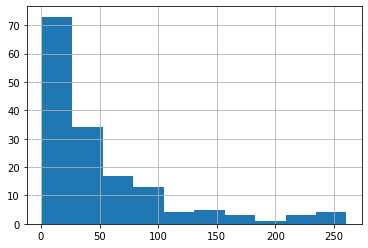

In [49]:
#Y value should be normally distributed
data_final.Sales_in_thousands.hist()

----Evaluating Best way of applying Transformation

<AxesSubplot:>

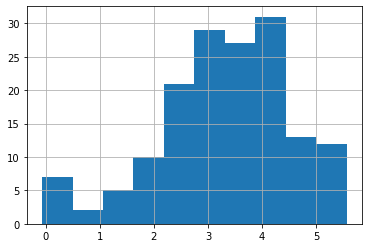

In [50]:
data_final['ln_Sales_in_thousands'] = np.log(data_final.Sales_in_thousands)
data_final.ln_Sales_in_thousands.hist()
#So, compare to Y normal distribution, log transformation looks little better

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_Sales_in_thousands', ylabel='Density'>

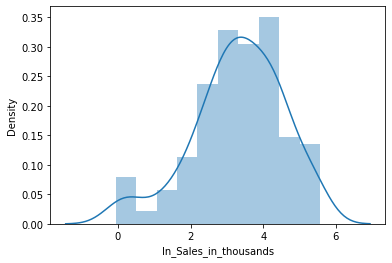

In [51]:
sns.distplot(data_final.ln_Sales_in_thousands)

In [52]:
# #Evaluating Best way of applying Transformation
# data_final['Sqr_Sales_in_thousands'] = np.square(data_final.Sales_in_thousands)
# data_final.Sqr_Sales_in_thousands.hist()

In [53]:
# sns.distplot(data_final.Sqr_Sales_in_thousands)

In [54]:
# #Evaluating Best way of applying Transformation
# data_final['Sqrt_Sales_in_thousands'] = np.sqrt(data_final.Sales_in_thousands)
# data_final.Sqrt_Sales_in_thousands.hist()

In [55]:
# sns.distplot(data_final.Sqrt_Sales_in_thousands)

In [56]:
# #Evaluating Best way of applying Transformation
# data_final['by1_Sales_in_thousands'] = 1/(data_final.Sales_in_thousands)
# data_final.by1_Sales_in_thousands.hist()

In [57]:
#sns.distplot(data_final.by1_Sales_in_thousands)

In [58]:
#So, on comparing to Y normal distribution, log transformation looks better here.

--2.6 Looking at the assumptions - Linearity relationship between Y & Xs

In [59]:
corr_mat = data_final.corr()
corr_mat.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\corr_mat.csv')
corr_mat

#Here Interest_Rate is not the Y variable, rather ln_Interest_Rate as we have done Transformation

Sales_in_thousands  four_year_resale_value  \
Sales_in_thousands                1.000000               -0.278159   
four_year_resale_value           -0.278159                1.000000   
Price_in_thousands               -0.360165                0.793488   
Engine_size                      -0.014360                0.433679   
Horsepower                       -0.259345                0.650040   
...                                    ...                     ...   
Vehicle_type_Passenger           -0.230252                0.084882   
Latest_Launch_2009               -0.001580               -0.030528   
Latest_Launch_2011               -0.071047                0.032400   
Latest_Launch_2012                0.076681               -0.029836   
ln_Sales_in_thousands             0.799513               -0.446719   

                        Price_in_thousands  Engine_size  Horsepower  \
Sales_in_thousands               -0.360165    -0.014360   -0.259345   
four_year_resale_value            0.793488     0.433679    0.650040   
Price_in_thousands                1.000000     0.617620    0.848090   
Engine_size                       0.617620     1.000000    0.814940   
Horsepower                        0.848090     0.814940    1.000000   
...                                    ...          ...         ...   
Vehicle_type_Passenger            0.044181    -0.278718   -0.010354   
Latest_Launch_2009               -0.056095    -0.023249   -0.054706   
Latest_Launch_2011                0.029998    -0.158338   -0.115172   
Latest_Launch_2012               -0.017699     0.151297    0.121557   
ln_Sales_in_thousands            -0.577818    -0.121159   -0.400985   

                        Wheelbase     Width    Length  Curb_weight  \
Sales_in_thousands       0.277956  0.092982  0.200773    -0.035062   
four_year_resale_value  -0.040450  0.165414  0.039665     0.276708   
Price_in_thousands       0.118450  0.328670  0.157301     0.526289   
Engine_size              0.518432  0.702573  0.576326     0.793314   
Horsepower               0.325489  0.538191  0.420530     0.637307   
...                           ...       ...       ...          ...   
Vehicle_type_Passenger  -0.382410 -0.239461 -0.130092    -0.518977   
Latest_Launch_2009       0.033387  0.044992  0.029321     0.013339   
Latest_Launch_2011      -0.150168 -0.154048 -0.146874    -0.115878   
Latest_Launch_2012       0.135612  0.147752  0.137730     0.102699   
ln_Sales_in_thousands    0.269885  0.037675  0.207303    -0.051943   

                        Fuel_capacity  ...  Model_Viper  Model_Voyager  \
Sales_in_thousands           0.044431  ...    -0.069826      -0.037519   
four_year_resale_value       0.269171  ...     0.335628      -0.041513   
Price_in_thousands           0.431595  ...     0.244005      -0.048388   
Engine_size                  0.698408  ...     0.217409      -0.053302   
Horsepower                   0.526853  ...     0.213830      -0.053818   
...                               ...  ...          ...            ...   
Vehicle_type_Passenger      -0.592597  ...     0.047599      -0.134671   
Latest_Launch_2009          -0.013261  ...    -0.009095      -0.009095   
Latest_Launch_2011          -0.192684  ...     0.079556       0.079556   
Latest_Launch_2012           0.185578  ...    -0.076570      -0.076570   
ln_Sales_in_thousands       -0.020216  ...    -0.214727      -0.007657   

                        Model_Windstar  Model_Wrangler  Model_Xterra  \
Sales_in_thousands            0.145645        0.006177      0.004230   
four_year_resale_value       -0.032175       -0.029739     -0.024015   
Price_in_thousands           -0.033675       -0.073619     -0.025692   
Engine_size                  -0.004082       -0.045099      0.020528   
Horsepower                   -0.053818       -0.099596     -0.023300   
...                                ...             ...           ...   
Vehicle_type_Passenger       -0.134671       -0.134671     -0.134671   
Latest_Launch_2009      

In [60]:
data_final.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity',
       ...
       'Model_Viper', 'Model_Voyager', 'Model_Windstar', 'Model_Wrangler',
       'Model_Xterra', 'Vehicle_type_Passenger', 'Latest_Launch_2009',
       'Latest_Launch_2011', 'Latest_Launch_2012', 'ln_Sales_in_thousands'],
      dtype='object', length=201)

In [61]:
#Feature Selection
data_final.info()
##Will start eliminating the features that are big in numbers as of now (Total 204).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Columns: 201 entries, Sales_in_thousands to ln_Sales_in_thousands
dtypes: float64(13), uint8(188)
memory usage: 44.9 KB


----Features means X variables, Target means Y - variable.

In [62]:
features = data_final[data_final.columns.difference(['ln_Sales_in_thousands','Sales_in_thousands'])]#Difference of this will give features
target = data_final['ln_Sales_in_thousands']

In [63]:
features.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Latest_Launch_2009', 'Latest_Launch_2011',
       'Latest_Launch_2012', 'Length', 'Manufacturer_Audi',
       ...
       'Model_Voyager', 'Model_Windstar', 'Model_Wrangler', 'Model_Xterra',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype='object', length=199)

In [64]:
#2. Renaming columns
features.columns = [i.replace(' ','_') for i in features.columns]
features.columns

features.columns = [i.replace('-','_') for i in features.columns]
features.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Latest_Launch_2009', 'Latest_Launch_2011',
       'Latest_Launch_2012', 'Length', 'Manufacturer_Audi',
       ...
       'Model_Voyager', 'Model_Windstar', 'Model_Wrangler', 'Model_Xterra',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype='object', length=199)

--2.7 No missings:

In [65]:
    ##Not required.

--2.8 No outliers:

In [66]:
    ##Not required.

--2.9 No multicollinierity

In [67]:
    ##Not required.

--2.10 No hetroscendasticity

In [68]:
    ##Not required.

# 2. Modeling - Data Preparation Step 2: Based on the technique -

# 2. Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction +

You can drop variables based on the data audit:

	If variables having lots of missings (>25%)					
	If nominal categorical having lots of categories (>25)					
	If variable having very less variation (CV<0.05)					
	Unique identifiers (Custid, Email, phone number, identification details)					
	Business understanding 					


In [69]:
# You can drop variables based on the data audit: Not required here.
# 	If variables having lots of missings (>25%): Not required here.
# 	If nominal categorical having lots of categories (>25): Not required here.
# 	If variable having very less variation (CV<0.05)					
# 	Unique identifiers (Custid, Email, phone number, identification details): Not required here.
# 	Business understanding: Not required here.

Based on the relationships:
    
	Based on Y & X relationships					
		Statistical methods (Corr, chisquare, Anova)				
		RFE - Recursive Feature Elimination				
		SelectKbest - Selecting K best features				
		Univariate Models			f-regression	
			Y & X			

In [70]:
#Now, will build the model & recursively eliminate the features.
from sklearn.feature_selection import RFE
import itertools

lm = LinearRegression()

#RFE

#Create the RFE model & select 10 attributes.
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features,target)
features.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Latest_Launch_2009', 'Latest_Launch_2011',
       'Latest_Launch_2012', 'Length', 'Manufacturer_Audi',
       ...
       'Model_Voyager', 'Model_Windstar', 'Model_Wrangler', 'Model_Xterra',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype='object', length=199)

In [71]:
rfe.support_
#So, rfe.support_ gives the 10 features to select. But such kind of feature selection sometimes not correct if we have 
#Multi-collinearity. 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
##To handle this problem, there are some techniques that handles multi-collinearity situation and provides important 
#features to consider. RandomForestRegressor() works here.

#Now, will build the model & recursively eliminate the features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import itertools

lm = RandomForestRegressor()

#RFE

#Create the RFE model & select 10 attributes.
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features,target)

features.columns
rfe.support_

array([ True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [73]:
#So, choosing top 10 features now
features.columns[rfe.support_]

Index(['Curb_weight', 'Engine_size', 'Length', 'Manufacturer_Ford',
       'Model_Cutlass', 'Power_perf_factor', 'Price_in_thousands', 'Wheelbase',
       'Width', 'four_year_resale_value'],
      dtype='object')

Based on Multicollineirity (relationship with in X variabels):

		Correlation metrics (>0.8)				
		VIF (>5)				
		PCA - Principle component Anlaysis	

In [74]:
#F-Regression # Feature selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(features, target)
display(F_values)
display(p_values)

array([4.19338324e-01, 2.30923264e+00, 6.33737762e-02, 2.90607197e+00,
       2.96972176e+01, 1.98194156e-01, 8.80430554e-01, 7.00338612e-01,
       6.96015169e+00, 2.87431325e+00, 7.26643425e-01, 1.19607342e+00,
       8.87998925e-01, 1.50931560e+00, 4.13080058e-02, 1.20726402e+00,
       2.10614471e+01, 3.85234853e+00, 4.09934318e-01, 1.20970235e-02,
       2.01879468e-01, 2.72420394e+00, 2.64821433e+00, 1.51744419e-02,
       9.87857270e+00, 1.22424884e-01, 1.76400323e+00, 2.09727185e+00,
       8.59196240e-01, 2.97104624e+00, 1.55566912e+00, 1.06531777e+01,
       1.14794614e+00, 1.96140578e-01, 1.73893824e-01, 3.41793527e+00,
       1.85193302e-01, 3.93450113e+00, 7.46578893e-01, 7.49211848e+00,
       8.98829565e-03, 6.51510578e-02, 7.40593898e-01, 5.35684416e-01,
       1.22466984e-01, 5.26871757e-02, 8.70914921e-02, 5.80969701e+00,
       1.07659226e-01, 2.93007828e+00, 7.38518818e-01, 8.72149782e-01,
       2.40385380e-01, 4.58174736e-01, 1.95183112e+00, 2.24369006e-01,
      

array([5.18225367e-01, 1.30644734e-01, 8.01574358e-01, 9.02500970e-02,
       1.94789033e-07, 6.56803545e-01, 3.49543601e-01, 4.03958331e-01,
       9.18466772e-03, 9.20112163e-02, 3.95288581e-01, 2.75804617e-01,
       3.47486572e-01, 2.21105620e-01, 8.39211120e-01, 2.73578420e-01,
       9.13006498e-06, 5.14665766e-02, 5.22948184e-01, 9.12562380e-01,
       6.53835677e-01, 1.00862237e-01, 1.05697419e-01, 9.02120518e-01,
       2.00400666e-03, 7.26894216e-01, 1.86078345e-01, 1.49582031e-01,
       3.55404779e-01, 8.67609662e-02, 2.14181742e-01, 1.35208055e-03,
       2.85644945e-01, 6.58471721e-01, 6.77251145e-01, 6.63966908e-02,
       6.67545426e-01, 4.90714610e-02, 3.88896683e-01, 6.92157707e-03,
       9.24590879e-01, 7.98870670e-01, 3.90799900e-01, 4.65331943e-01,
       7.26849159e-01, 8.18754282e-01, 7.68302730e-01, 1.71090569e-02,
       7.43267786e-01, 8.89433819e-02, 3.91462901e-01, 3.51813395e-01,
       6.24621222e-01, 4.99487182e-01, 1.64386525e-01, 6.36397422e-01,
      

In [75]:
itertools.zip_longest(features.columns, F_values, p_values)
f_reg_results = [(i,v,z) for i, v, z in itertools.zip_longest(features.columns, F_values, ['%.3f' % p for p in p_values])]
f_reg_results ## Tuple with Features with their F_values & p_values

[('Curb_weight', 0.4193383236897411, '0.518'),
 ('Engine_size', 2.3092326399841254, '0.131'),
 ('Fuel_capacity', 0.0633737762488309, '0.802'),
 ('Fuel_efficiency', 2.906071966918858, '0.090'),
 ('Horsepower', 29.69721759612442, '0.000'),
 ('Latest_Launch_2009', 0.19819415618176064, '0.657'),
 ('Latest_Launch_2011', 0.8804305540732192, '0.350'),
 ('Latest_Launch_2012', 0.7003386118344607, '0.404'),
 ('Length', 6.960151694827, '0.009'),
 ('Manufacturer_Audi', 2.874313252868616, '0.092'),
 ('Manufacturer_BMW', 0.7266434253153692, '0.395'),
 ('Manufacturer_Buick', 1.196073420056473, '0.276'),
 ('Manufacturer_Cadillac', 0.8879989254700806, '0.347'),
 ('Manufacturer_Chevrolet', 1.5093155984672446, '0.221'),
 ('Manufacturer_Chrysler', 0.04130800578588597, '0.839'),
 ('Manufacturer_Dodge', 1.2072640230324652, '0.274'),
 ('Manufacturer_Ford', 21.06144710036495, '0.000'),
 ('Manufacturer_Honda', 3.852348531873386, '0.051'),
 ('Manufacturer_Hyundai', 0.4099343177681413, '0.523'),
 ('Manufacturer_

In [76]:
f_reg_results = pd.DataFrame(f_reg_results,columns=['Variable','F_Value', 'P_Value'])
f_reg_results.sort_values(by=['F_Value'], ascending = False, inplace = True)
f_reg_results.to_csv(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\f_reg_results.csv')
f_reg_results

#For F_Regression--> model building is not required
#Multi-collinearity is not for Bi-Variate. It's for Uni-variate

Variable    F_Value P_Value
194      Price_in_thousands  77.688585   0.000
193       Power_perf_factor  38.719605   0.000
198  four_year_resale_value  38.642959   0.000
4                Horsepower  29.697218   0.000
16        Manufacturer_Ford  21.061447   0.000
..                      ...        ...     ...
84             Model_Cougar   0.000439   0.983
144       Model_Park_Avenue   0.000311   0.986
137       Model_Mountaineer   0.000115   0.991
91            Model_E_Class   0.000110   0.992
150             Model_Quest   0.000004   0.998

[199 rows x 3 columns]

In [77]:
#Let's find out variables whose F-value > 5
top_f_reg_vars = f_reg_results.loc[f_reg_results['F_Value'] > 5]
top_f_reg_vars['Variable']

194         Price_in_thousands
193          Power_perf_factor
198     four_year_resale_value
4                   Horsepower
16           Manufacturer_Ford
195     Vehicle_type_Passenger
196                  Wheelbase
31        Manufacturer_Porsche
24     Manufacturer_Mercedes_B
188                Model_Viper
39                Model_3000GT
63                 Model_CL500
8                       Length
86               Model_Cutlass
71         Model_Carrera_Coupe
47                    Model_A8
168               Model_SLK230
Name: Variable, dtype: object

In [78]:
#Whenever we see the Multi-collinearity, we should evaluate VIF to eliminate features.
#Below list came from excel file 'f_reg_results.csv' - columns
final_list = ['Price_in_thousands',
'Power_perf_factor',
'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

from statsmodels.stats.outliers_influence import variance_inflation_factor #This library provides VIF
X = features[final_list] 
target

0      2.828437
1      3.673360
2      2.647167
3      2.150366
4      3.015388
         ...   
152    1.265538
153    2.724252
154    2.863971
155    1.250761
156    2.942806
Name: ln_Sales_in_thousands, Length: 157, dtype: float64

In [79]:
X.columns

#If we see here 'Price_in_thousands' has the multi-colliearity with other variables.

Index(['Price_in_thousands', 'Power_perf_factor', 'four_year_resale_value',
       'Horsepower', 'Manufacturer_Ford', 'Vehicle_type_Passenger',
       'Wheelbase', 'Manufacturer_Porsche', 'Manufacturer_Mercedes_B',
       'Model_Viper', 'Model_3000GT', 'Model_CL500', 'Length', 'Model_Cutlass',
       'Model_Carrera_Coupe', 'Model_A8', 'Model_SLK230'],
      dtype='object')

In [80]:
#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

VIF_Factor                 Features
1   2927.993839        Power_perf_factor
3   2179.648943               Horsepower
12  1025.907418                   Length
6    893.621489                Wheelbase
0    116.849787       Price_in_thousands
2     19.038910   four_year_resale_value
5      4.742537   Vehicle_type_Passenger
7      2.165943     Manufacturer_Porsche
8      1.973602  Manufacturer_Mercedes_B
11     1.549958              Model_CL500
14     1.515863      Model_Carrera_Coupe
9      1.331389              Model_Viper
16     1.198600             Model_SLK230
4      1.131515        Manufacturer_Ford
15     1.111116                 Model_A8
10     1.035019             Model_3000GT
13     1.018426            Model_Cutlass

In [81]:
#We see above that VIF value is higher for 'Power_perf_factor' & 'Horsepower' columns. So, will try to eliminate 1 feature at a time
#to see the effect.

#Will start considering 'Power_perf_factor' first. 

final_list = [
'Price_in_thousands',
#'Power_perf_factor',
'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have come down significantly now.

VIF_Factor                 Features
11  1024.755414                   Length
5    892.515113                Wheelbase
2     71.497568               Horsepower
0     45.152602       Price_in_thousands
1     19.022603   four_year_resale_value
4      4.736194   Vehicle_type_Passenger
6      2.157645     Manufacturer_Porsche
7      1.969640  Manufacturer_Mercedes_B
10     1.532769              Model_CL500
13     1.515609      Model_Carrera_Coupe
8      1.304905              Model_Viper
15     1.198556             Model_SLK230
3      1.129332        Manufacturer_Ford
14     1.109533                 Model_A8
9      1.034951             Model_3000GT
12     1.017928            Model_Cutlass

In [82]:
##But, We see that VIF value for 'Power_perf_factor' column is highest but at the same time this is also 
#one of the most important feature. So, will not consider to drop it. Will try eliminating with 'Length' column.

#Trying to eliminate 'Length' & see the impact.

final_list = [
'Price_in_thousands',
#'Power_perf_factor',
'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
#'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

VIF_Factor                 Features
2    64.302567               Horsepower
0    43.686995       Price_in_thousands
5    25.908303                Wheelbase
1    18.973276   four_year_resale_value
4     3.692110   Vehicle_type_Passenger
6     2.148661     Manufacturer_Porsche
7     1.906872  Manufacturer_Mercedes_B
10    1.525788              Model_CL500
12    1.514366      Model_Carrera_Coupe
8     1.304647              Model_Viper
14    1.198067             Model_SLK230
3     1.127231        Manufacturer_Ford
13    1.107251                 Model_A8
9     1.020564             Model_3000GT
11    1.013936            Model_Cutlass

In [83]:
#Trying to eliminate 'Price_in_thousands' (not Horsepower, as it's an important feature),'Length' & see the impact.

final_list = [
#'Price_in_thousands',
#'Power_perf_factor',
'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
#'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

VIF_Factor                 Features
1    30.530861               Horsepower
4    22.635940                Wheelbase
0    13.248160   four_year_resale_value
3     3.665786   Vehicle_type_Passenger
5     2.145071     Manufacturer_Porsche
6     1.696601  Manufacturer_Mercedes_B
11    1.513390      Model_Carrera_Coupe
7     1.304636              Model_Viper
9     1.276331              Model_CL500
13    1.185379             Model_SLK230
2     1.124899        Manufacturer_Ford
12    1.094874                 Model_A8
8     1.020525             Model_3000GT
10    1.013934            Model_Cutlass

In [84]:
#Trying to eliminate Wheelbase, 'Price_in_thousands' (not Horsepower, as it's an important feature),'Length' & see the impact.

final_list = [
#'Price_in_thousands',
#'Power_perf_factor',
'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
#'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
#'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

VIF_Factor                 Features
0    13.241261   four_year_resale_value
1    12.376226               Horsepower
3     3.201080   Vehicle_type_Passenger
4     2.057017     Manufacturer_Porsche
5     1.651575  Manufacturer_Mercedes_B
10    1.507867      Model_Carrera_Coupe
8     1.261793              Model_CL500
6     1.226720              Model_Viper
12    1.185030             Model_SLK230
2     1.077674        Manufacturer_Ford
11    1.055183                 Model_A8
7     1.020520             Model_3000GT
9     1.011140            Model_Cutlass

In [85]:
#Trying to eliminate four_year_resale_value,Wheelbase, 'Price_in_thousands' (not Horsepower, as it's an important feature),'Length' & see the impact.

final_list = [
#'Price_in_thousands',
#'Power_perf_factor',
#'four_year_resale_value',
'Horsepower',
'Manufacturer_Ford',
'Vehicle_type_Passenger',
#'Wheelbase',
'Manufacturer_Porsche',
'Manufacturer_Mercedes_B',
'Model_Viper',
'Model_3000GT',
'Model_CL500',
#'Length',
'Model_Cutlass',
'Model_Carrera_Coupe',
'Model_A8',
'Model_SLK230']

X = features[final_list] 

#Let's calculate VIF and save in dataframe
vif = pd.DataFrame() #Way of creating an empty DataFrame
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF_Factor', ascending = False)

#We can see that, VIF values have came down significantly now.

VIF_Factor                 Features
0     3.484796               Horsepower
2     3.195399   Vehicle_type_Passenger
3     1.544338     Manufacturer_Porsche
9     1.501031      Model_Carrera_Coupe
4     1.389773  Manufacturer_Mercedes_B
11    1.145861             Model_SLK230
7     1.144481              Model_CL500
1     1.072331        Manufacturer_Ford
5     1.024507              Model_Viper
10    1.021793                 Model_A8
8     1.010395            Model_Cutlass
6     1.010198             Model_3000GT

In [86]:
#So, we can say that it's an iterative process to eliminate the features.
#Also, by seeing last list of features along with VIF values, it seems that now there is no multi-collinearity left now.

#So, let's now what are our features available after removing the multi-collinearity
X

Horsepower  Manufacturer_Ford  Vehicle_type_Passenger  \
0         140.0                  0                       1   
1         225.0                  0                       1   
2         225.0                  0                       1   
3         210.0                  0                       1   
4         150.0                  0                       1   
..          ...                ...                     ...   
152       160.0                  0                       1   
153       168.0                  0                       1   
154       168.0                  0                       1   
155       236.0                  0                       1   
156       201.0                  0                       1   

     Manufacturer_Porsche  Manufacturer_Mercedes_B  Model_Viper  Model_3000GT  \
0                       0                        0            0             0   
1                       0                        0            0             0   
2                       0                        0            0             0   
3                       0                        0            0             0   
4                       0                        0            0             0   
..                    ...                      ...          ...           ...   
152                     0                        0            0             0   
153                     0                        0            0             0   
154                     0                        0            0             0   
155                     0                        0            0             0   
156                     0                        0            0             0   

     Model_CL500  Model_Cutlass  Model_Carrera_Coupe  Model_A8  Model_SLK230  
0              0              0                    0         0             0  
1              0              0                    0         0             0  
2              0              0                    0         0             0  
3              0              0                    0         0             0  
4              0              0                    0         0             0  
..           ...            ...                  ...       ...           ...  
152            0              0                    0         0             0  
153            0              0                    0         0             0  
154            0              0                    0         0             0  
155            0              0                    0         0             0  
156            0              0                    0         0             0  

[157 rows x 12 columns]

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Horsepower               157 non-null    float64
 1   Manufacturer_Ford        157 non-null    uint8  
 2   Vehicle_type_Passenger   157 non-null    uint8  
 3   Manufacturer_Porsche     157 non-null    uint8  
 4   Manufacturer_Mercedes_B  157 non-null    uint8  
 5   Model_Viper              157 non-null    uint8  
 6   Model_3000GT             157 non-null    uint8  
 7   Model_CL500              157 non-null    uint8  
 8   Model_Cutlass            157 non-null    uint8  
 9   Model_Carrera_Coupe      157 non-null    uint8  
 10  Model_A8                 157 non-null    uint8  
 11  Model_SLK230             157 non-null    uint8  
dtypes: float64(1), uint8(11)
memory usage: 3.0 KB


In [88]:
data_final1 = pd.concat([X,target],axis=1)
data_final1.head()

Horsepower  Manufacturer_Ford  Vehicle_type_Passenger  \
0       140.0                  0                       1   
1       225.0                  0                       1   
2       225.0                  0                       1   
3       210.0                  0                       1   
4       150.0                  0                       1   

   Manufacturer_Porsche  Manufacturer_Mercedes_B  Model_Viper  Model_3000GT  \
0                     0                        0            0             0   
1                     0                        0            0             0   
2                     0                        0            0             0   
3                     0                        0            0             0   
4                     0                        0            0             0   

   Model_CL500  Model_Cutlass  Model_Carrera_Coupe  Model_A8  Model_SLK230  \
0            0              0                    0         0             0   
1            0              0                    0         0             0   
2            0              0                    0         0             0   
3            0              0                    0         0             0   
4            0              0                    0         0             0   

   ln_Sales_in_thousands  
0               2.828437  
1               3.673360  
2               2.647167  
3               2.150366  
4               3.015388

In [89]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Horsepower               157 non-null    float64
 1   Manufacturer_Ford        157 non-null    uint8  
 2   Vehicle_type_Passenger   157 non-null    uint8  
 3   Manufacturer_Porsche     157 non-null    uint8  
 4   Manufacturer_Mercedes_B  157 non-null    uint8  
 5   Model_Viper              157 non-null    uint8  
 6   Model_3000GT             157 non-null    uint8  
 7   Model_CL500              157 non-null    uint8  
 8   Model_Cutlass            157 non-null    uint8  
 9   Model_Carrera_Coupe      157 non-null    uint8  
 10  Model_A8                 157 non-null    uint8  
 11  Model_SLK230             157 non-null    uint8  
 12  ln_Sales_in_thousands    157 non-null    float64
dtypes: float64(2), uint8(11)
memory usage: 4.3 KB


# 2. Modeling - Data Preparation Step 3: Feature Engineering - Feature selection - Variable reduction -

# 2. Modeling - Data Preparation Step 4: +
--Split the data into Train (build) & Test (validate) 70:30			
	Train	SRS of 70% of total data			
	Test	SRS of 30% of remaining sample

In [90]:
#Now, we can split the data into train & test.
train,test =  train_test_split(data_final1, test_size=0.3,)
display(train.shape)
display(test.shape)

(109, 13)

(48, 13)

--Build the model on Train data (Development data)	

	All variables coming significant or not							
	Model possible or not							
	Having good goodness of fit metric (R^2)							
	Variables signs of coefficients are matching with individual correlations coeficients							
								
	Final mathematical equation & predict the value for train data							
								


In [91]:
#Let's see the available features 
display(X.columns)

#Now let's prepare the equation containing target & all features; to input to model.
eqn = 'ln_Sales_in_thousands ~ ' + '+'.join(X.columns)
display(eqn)
eqn = 'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Manufacturer_Mercedes_B+Model_Viper+Model_3000GT+Model_CL500+Model_Cutlass+Model_Carrera_Coupe+Model_A8+Model_SLK230'

Index(['Horsepower', 'Manufacturer_Ford', 'Vehicle_type_Passenger',
       'Manufacturer_Porsche', 'Manufacturer_Mercedes_B', 'Model_Viper',
       'Model_3000GT', 'Model_CL500', 'Model_Cutlass', 'Model_Carrera_Coupe',
       'Model_A8', 'Model_SLK230'],
      dtype='object')

'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Manufacturer_Mercedes_B+Model_Viper+Model_3000GT+Model_CL500+Model_Cutlass+Model_Carrera_Coupe+Model_A8+Model_SLK230'

--Metrics	R-Square						

		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis						
								

In [92]:
#Let's use OLS method now...
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.509
Model:                               OLS   Adj. R-squared:                  0.459
Method:                    Least Squares   F-statistic:                     10.17
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           1.53e-11
Time:                           20:11:44   Log-Likelihood:                -141.38
No. Observations:                    109   AIC:                             304.8
Df Residuals:                         98   BIC:                             334.4
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

E:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [93]:
#Let's use OLS method now...
#We are reducing the features iteratively on the basis of P-value here. If p-value is high, will reduce that feature.
#Iterative feature reduction based on high p-value...
# Removing  Manufacturer_Mercedes_B

eqn = 'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Model_Viper+Model_3000GT+Model_CL500+Model_Cutlass+Model_Carrera_Coupe+Model_A8+Model_SLK230'
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.508
Model:                               OLS   Adj. R-squared:                  0.464
Method:                    Least Squares   F-statistic:                     11.37
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           4.70e-12
Time:                           20:11:44   Log-Likelihood:                -141.47
No. Observations:                    109   AIC:                             302.9
Df Residuals:                         99   BIC:                             329.9
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

E:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [94]:
#Let's use OLS method now...
#We are reducing the features iteratively on the basis of P-value here. If p-value is high, will reduce that feature.
#Iterative feature reduction based on high p-value...
# Removing  Model_Carrera_Coupe, Manufacturer_Mercedes_B

eqn = 'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Model_Viper+Model_3000GT+Model_CL500+Model_Cutlass+Model_A8+Model_SLK230'
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.508
Model:                               OLS   Adj. R-squared:                  0.464
Method:                    Least Squares   F-statistic:                     11.37
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           4.70e-12
Time:                           20:11:44   Log-Likelihood:                -141.47
No. Observations:                    109   AIC:                             302.9
Df Residuals:                         99   BIC:                             329.9
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

E:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [95]:
#Let's use OLS method now...
#We are reducing the features iteratively on the basis of P-value here. If p-value is high, will reduce that feature.
#Iterative feature reduction based on high p-value...
# Removing  Model_CL500 , Model_Carrera_Coupe, Manufacturer_Mercedes_B

eqn = 'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Model_Viper+Model_3000GT+Model_Cutlass+Model_A8+Model_SLK230'
ols_model = smp.ols(formula = eqn, data=train) #Here, equation & data is changed.
ols_model_output = ols_model.fit()

print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.474
Model:                               OLS   Adj. R-squared:                  0.432
Method:                    Least Squares   F-statistic:                     11.25
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           3.07e-11
Time:                           20:11:44   Log-Likelihood:                -145.18
No. Observations:                    109   AIC:                             308.4
Df Residuals:                        100   BIC:                             332.6
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

E:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [96]:
#Mathematical equation 
#ln_Sales_in_thousands = -0.0066*Horsepower + 1.1877*Manufacturer_Ford -0.4481*Vehicle_type_Passenger -1.5666*Manufacturer_Porsche -2.4109*Model_Viper -3.4925*Model_3000GT -3.3938*Model_Cutlass -2.1274*Model_A8 -2.8475*Model_SLK230 + 4.9328
##But above is not the actual mathematical equation. Actual eqn will be below, using exp().

#Sales_in_thousands = exp(-0.0066*Horsepower + 1.1877*Manufacturer_Ford -0.4481*Vehicle_type_Passenger -1.5666*Manufacturer_Porsche -2.4109*Model_Viper -3.4925*Model_3000GT -3.3938*Model_Cutlass -2.1274*Model_A8 -2.8475*Model_SLK230 + 4.9328)

--Validate the model using test data (new data)								

	Predict value using mathematical equation finalized in the above step							
								
	Calculate all the below metrics for test data							
	Metrics	R-Square						
		MAPE/RMSE/MSE/RMSPE						
								
		Corr(Actual, predicted) should be high						
		Corr(Actual, errors) should be low						
								
		Decile analysis						
								

In [97]:
ols_model_output.predict(train)

0      3.492219
39    -0.064773
135    3.885524
115    3.550719
91     3.848962
         ...   
74     3.410215
139    3.492219
45     3.995211
19     3.675030
107    3.848962
Length: 109, dtype: float64

In [98]:
#But above is not the actual train prediction, as Y should be exp(). i.e.
train_predicted = np.exp(ols_model_output.predict(train))
train_predicted

0      32.858787
39      0.937280
135    48.692466
115    34.838350
91     46.944313
         ...    
74     30.271761
139    32.858787
45     54.337305
19     39.449855
107    46.944313
Length: 109, dtype: float64

In [99]:
#Similarly, test predcition
test_predicted = np.exp(ols_model_output.predict(test))
test_predicted

118     30.541754
150     39.449855
141     39.388085
87      36.668054
82      19.694668
140     57.610831
11      15.815248
96      22.796269
89      21.188793
131     36.937170
146     39.449855
49     104.829117
78      18.144074
94      12.244036
127     26.386323
55     242.668400
31      34.838350
95      10.050304
38      20.881164
24       8.469671
120     21.188793
132     33.587587
35      34.838350
67      67.666038
50     148.908050
6        9.479232
144     30.271761
8       22.301625
13      20.428075
130     44.023213
106     46.944313
62      45.171072
114     34.838350
80      29.661353
154     26.775056
76      12.244036
32      14.381070
136     38.033530
66      15.815248
125      3.022376
5       21.188793
151     28.388107
119     25.439004
137     34.584525
28      27.772128
129     44.023213
68      40.557193
112     40.557193
dtype: float64

In [100]:
#Metrics (MAPE, RMSE, MSE, RMSPE)
train_actual = np.exp(train.ln_Sales_in_thousands)
test_actual = np.exp (test.ln_Sales_in_thousands)

In [101]:
#RMSE
##Error --
train_actual - train_predicted

##Square Error --
np.square(train_actual - train_predicted)

##Mean Square Error --
np.mean(np.square(train_actual - train_predicted))

##Root Mean Square Error --
train_RMSE = np.sqrt(np.mean(np.square(train_actual - train_predicted)))
display(train_RMSE)

#Similarly,
test_RMSE = np.sqrt(np.mean(np.square(test_actual - test_predicted)))
display(test_RMSE)

49.94167532309815

48.93034447333674

In [102]:
##MAPE --
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
display(train_MAPE)

test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
display(test_MAPE)


0.9986430169389036

0.9504791638838009

In [103]:
#RMSPE
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
display(train_RMSPE)
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))
display(test_RMSPE)

1.8383131862125506

1.5862549186162342

In [104]:
#So, now if we see that these matrix are similar that means we are now confident that level 1 validation is done.

--cross check if the metrics between train & test similar or not							
    
						
   Once ensured there is no problem of overfitting and underfitting, you can finalize the model

In [105]:
#Now co-relation between actual & predicted:
display(np.corrcoef(train_actual, train_predicted))
display(np.corrcoef(test_actual, test_predicted))

array([[1.        , 0.51449009],
       [0.51449009, 1.        ]])

array([[1.        , 0.66143326],
       [0.66143326, 1.        ]])

In [106]:
#Check
#Errors following normal distribution
#Errors should not have relationship with Y

train_errors = train_actual-train_predicted
display(train_errors)

test_errors = test_actual-test_predicted
display(test_errors)

0     -1.593979e+01
39     3.330669e-15
135   -1.566447e+01
115   -2.959835e+01
91    -2.656431e+01
           ...     
74    -2.114576e+01
139    4.102125e-01
45     1.274117e+02
19     1.060691e+02
107    1.806069e+01
Length: 109, dtype: float64

118     21.103246
150     10.013145
141     25.730915
87     -10.139054
82     -13.983668
140     26.476169
11      23.534752
96     -14.798269
89      59.985207
131    -31.714170
146     44.271145
49     140.985883
78       4.780926
94       4.529964
127    -17.195323
55     -22.018400
31      -2.532350
95      -6.739304
38      67.146836
24       9.477329
120     -1.277793
132    -25.115587
35      41.195650
67     -12.109038
50      26.761950
6       -8.099232
144    -20.436761
8      -13.070625
13      62.828925
130    -19.477213
106      7.213687
62      -3.987072
114     -2.104350
80      12.879647
154     -9.244056
76       1.553964
32      -0.919070
136    104.501470
66      -0.348248
125     -1.742376
5       -2.408793
151    -11.431107
119    105.657996
137    213.409475
28     -19.918128
129     36.596787
68      39.998807
112    -20.540193
dtype: float64

E:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

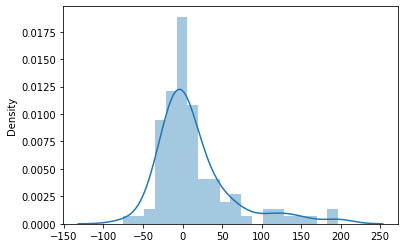

In [107]:
#By seeing above result, ideally the distribution should be Normal. If it is not then, we'll still have opportunity to furthure
#correct the model.
sns.distplot(train_errors)

#So, it is not Normal. Some skewness on right side, so still have scope to improve it further.

In [108]:
#Decile Analysis: Dividing data into 10 parts based on cut-offs(p10,p20,p30,..)
##Decile is used to avoid comparison between each actual & predicted values. It helps to create certain no. of bins (10 here),
##to see the comparison of different bins and to find out if actual & predicted values are increasing/decreasing in sync.

train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)
train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

actual        pred
Deciles                        
0          9.352630    6.752768
1         24.811500   16.629801
2         28.922167   20.125311
3         52.439455   24.498725
4         60.741091   28.544900
5         44.993111   31.715637
6         48.384545   35.591939
7         62.970000   41.164561
8         49.978455   48.720470
9        117.645876  101.675133

In [109]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)
test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

actual        pred
Deciles                        
0          9.081667    9.251609
1         22.801000   16.038910
2         49.476833   20.761715
3         49.442000   23.512299
4         18.814800   27.796594
5         65.574286   33.357239
6         15.876000   36.802612
7         73.568500   39.572619
8         50.127000   45.040453
9        156.355800  124.336487

In [110]:
# Two important things:
#Is model overfitting? Ans: No
#Is model underfitting? Ans: Yes (based on correlation between actual & errors), r-squre is low

#How to handle overfitting:
# Overfitting occurs because of complexity of model (Lot of variables, lots of transformations)
    #Regularization
    #Crosss validation (K-Fold validation)
# Standard errors are very high for coefficients (Because of smaple is low - number of observations are low)
# If the data have multicollineirity
# IF you don't follow the assumptions
# If you don't prepare data appropriate manner

# How to handle underfitting?
#if don't Including more variables
# if don't Follow the assumption of linearity (X & Y should have linear relationship)
# If the data have multicollineirity
# IF you don't follow the assumptions
# If you don't prepare data appropriate manner
# if you don't use right technique 
# if you don't used right Tuning parameters (Machine Learning)

In [111]:
import joblib
joblib.dump(ols_model_output, 'ols_model')

#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\CarSalesRegressionModel_ols.pkl', 'wb') as f:
    pickle.dump(ols_model_output, f)
    
# and later you can load it
with open(r'E:\AI\ALabs\Python - ML\Assignments-ML\1. Case Study - Automobile Example - Class Exercise\CarSalesRegressionModel_ols.pkl', 'rb') as f:
    model = pickle.load(f)

In [112]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.474
Model:                               OLS   Adj. R-squared:                  0.432
Method:                    Least Squares   F-statistic:                     11.25
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           3.07e-11
Time:                           20:11:45   Log-Likelihood:                -145.18
No. Observations:                    109   AIC:                             308.4
Df Residuals:                        100   BIC:                             332.6
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [113]:
eqn = 'ln_Sales_in_thousands ~ Horsepower+Manufacturer_Ford+Vehicle_type_Passenger+Manufacturer_Porsche+Model_Viper+Model_3000GT+Model_Cutlass+Model_A8+Model_SLK230'
#smp.ols(formula = 'y~x1+x2+x3+x4', data=data_final)

ols_model = smp.ols(formula = eqn, data=data_final)
ols_model_output = ols_model.fit()
print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.487
Model:                               OLS   Adj. R-squared:                  0.456
Method:                    Least Squares   F-statistic:                     15.51
Date:                   Sun, 06 Dec 2020   Prob (F-statistic):           1.34e-17
Time:                           20:11:45   Log-Likelihood:                -206.19
No. Observations:                    157   AIC:                             432.4
Df Residuals:                        147   BIC:                             462.9
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# 2. Modeling - Data Preparation Step 4 -